# Classical reference state

Starting from the base state $|000\rangle$, we can apply the $X$ gate to obtain the state $|001\rangle$.

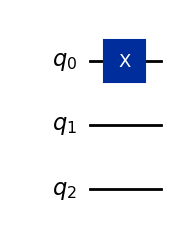

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.x(0)

qc.draw("mpl", style="iqp")

# Quantum reference state

If we wanted to start with a more complex state (involving superposition/entanglement), we could use the following circuit to prepare the state like $\frac{1}{√2}(|100\rangle + |111\rangle)$.

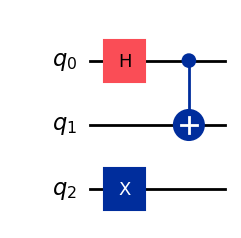

In [4]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.x(2)

qc.draw("mpl", style="iqp")

# Constructing Reference States using template circuits

Various template circuits are available in Qiskit that can be used to prepare reference states. For example, the `TwoLocal` class can be used and we can use them for our reference states if we bind the parameters using `assign_parameters`.

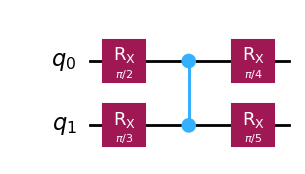

In [7]:
from qiskit.circuit.library import TwoLocal
from math import pi

reference_circuit = TwoLocal(2, "rx", "cz", entanglement="linear", reps=1)
theta_list = [pi / 2, pi / 3, pi / 4, pi / 5]

reference_circuit = reference_circuit.assign_parameters(theta_list)

reference_circuit.decompose().draw("mpl", style="iqp")

# Application-specific reference states

### Quantum machine learning

In the context of a variational quantum classifier (VQC), the training data is encoded into a quantum state with a parameterized circuit known as a feature map, where each parameter value represents a data point from the training dataset. The `ZZFeatureMap` is a type of parameterized circuit that can be utilized to pass our data points $(
x)$ to this feature map.

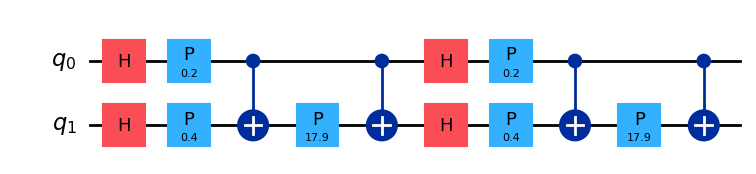

In [14]:
from qiskit.circuit.library import ZZFeatureMap

data = [0.1, 0.2]

zz_feature_map_reference = ZZFeatureMap(feature_dimension=2, reps=2)
zz_feature_map_reference = zz_feature_map_reference.assign_parameters(data)
zz_feature_map_reference.decompose().draw("mpl", style="iqp")